In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
X = df.drop('price', axis = 1)
y = df.iloc[:, -1]

In [4]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

X_scaled = sx.fit_transform(X.values)
y_scaled = sy.fit_transform(y.values.reshape(df.shape[0], 1))

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    bias = 0
    total_samples = X.shape[0]
    
    w = np.ones(shape = X.shape[1]) 

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w, X.T) + bias

        cost = np.mean(np.square(y_true - y_pred))

        w_derivative = -(2/total_samples) * (X.T.dot(y_true - y_pred))
        bias_derivative = -(2/total_samples) * np.sum(y_true - y_pred)

        w = w - learning_rate * w_derivative
        bias = bias - learning_rate * bias_derivative

        if (i+1) % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost, cost_list, epoch_list

In [6]:
w, bias, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0], ), epochs = 500)

In [7]:
w, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

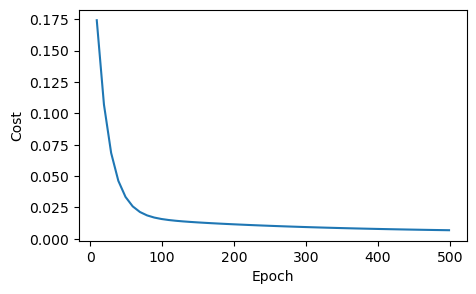

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

In [9]:
def predict(area, bedrooms, w, bias):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    price_scaled = X_scaled[0]* w[0] + X_scaled[1]* w[1] + bias
    price = sy.inverse_transform([[price_scaled]])[0][0]
    return price

In [10]:
predict(2600, 4, w, bias)

128.45484403267596